<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 

from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt 


In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(60608)

In [3]:
pip install uszipcode

     |████████████████████████████████| 143kB 2.9MB/s 
     |████████████████████████████████| 204kB 49.3MB/s 
     |████████████████████████████████| 122kB 50.0MB/s 
     |████████████████████████████████| 51kB 19.9MB/s 
  Created wheel for autopep8: filename=autopep8-1.4.4-py2.py3-none-any.whl size=42630 sha256=f80ab235bb2ac7b474445e25bb5b3891e04576e0f3eb45f7d53bb14ac12e3b1f
  Stored in directory: /root/.cache/pip/wheels/7e/f5/4b/c19e6276126325eb8071b273347c05a830c37a82b9b3b81510
Successfully built autopep8


In [0]:
from uszipcode import Zipcode 
from uszipcode import SearchEngine
search = SearchEngine(simple_zipcode=True)

In [0]:
zipcode = search.by_zipcode("60608")

In [26]:
zipcode

SimpleZipcode(zipcode='60608', zipcode_type='Standard', major_city='Chicago', post_office_city='Chicago, IL', common_city_list=['Chicago'], county='Cook County', state='IL', lat=41.85, lng=-87.68, timezone='Central', radius_in_miles=2.0, area_code_list=['773', '872'], population=82739, population_density=13025.0, land_area_in_sqmi=6.35, water_area_in_sqmi=0.18, housing_units=28852, occupied_housing_units=25196, median_home_value=230700, median_household_income=35336, bounds_west=-87.703045, bounds_east=-87.641546, bounds_north=41.868438, bounds_south=41.830238)

In [27]:
print(location.address)

Illinois Medical District, Chicago, Cook County, Illinois, 60608, USA


In [28]:
print(location.latitude,location.longitude)

41.8626357 -87.6687915


In [0]:
f = open(r'testData.txt')

In [0]:
lines = f.readlines()[1:6000]

In [0]:
loc = []
xx = [] #longitude
yy = [] #latitude
inputs = [] #longitude latitude and birthday
payment = []
birthday = [] 

In [0]:
def use_uszipcode(_houseZip):
  search = SearchEngine(simple_zipcode=True)
  # using zipcode
  location = search.by_zipcode(_houseZip)
  #print(location.values()[7:9])
  x = [location.values()[7],location.values()[8]]
  #print(x)
  
  return x 
  

In [0]:
def use_geocode(_houseZip):
  location = geolocator.geocode(_houseZip)
  if(location!=None):
    print(location)
    print(location.latitude,location.longitude)
    x = location.latitude,location.longitude
    #xx = location.latitude
    #yy = location.longitude
    #loc.append(x)
    #xx.append(location.longitude)
    #yy.append(location.latitude)
    #payment.append(_paymentAmount)
    
    return x 
    #output.write(str(x[0]))
    #output.write(str(x[1]))
    #output.write(str(_paymentAmount))
    #output.write('\n')
  

In [95]:
output = open('outputfile.csv','w')
count = 0 
for line in lines:
  count += 1
  print(count) 
  if(line.find(',')==0):
    line = line[1:]
  _name = line[:line.find(',')]
  print(_name)
  line = line[line.find(',')+1:]
  print(line)
  _dob = line[:line.find(',')]
  print(_dob)
  
  print(_dob.find('/')!=-1)
  
  if(_dob.find('/')!=-1):
    _dob = _dob[6:]
  else: 
    _dob = _dob[:4]
  
  print(_dob) 
  
  _dob = int(_dob)
  
  line = line[line.find(',')+1:]
  _houseID = line[:line.find(',')]
  print(_houseID)
  line = line[line.find(',')+1:]
  _houseZip = line[:line.find(',')]
  print(_houseZip)
  line = line[line.find(',')+1:]
  _paymentDate = line[:line.find(',')]
  print(_paymentDate)
  line = line[line.find(',')+1:]
  _paymentAmount = line[:line.find(',')]
  if(len(_paymentAmount)>0 ):
    _paymentAmount = float(_paymentAmount)
  else:
    _paymentAmount = 0 
  print(_paymentAmount)
  line = line[line.find(',')+1:]
  _rentAmount = line[:line.find('\n')]
  print(_rentAmount)
  
  # using zipcode
  location = search.by_zipcode("60608")
  x = use_uszipcode(_houseZip)
  if(x[0]!=None):
    loc.append(x)
    print(x)
    payment.append(_paymentAmount)
    xx.append(x[1])
    yy.append(x[0])
    birthday.append(_dob)
    tmp =[x[1],x[0],_dob]
    inputs.append(tmp)
    print(tmp)
  
  #x = use_geocode(_houseZip) 
  #if(x!=None):
  #  loc.append(x)
  #  print(x)
  #  payment.append(_paymentAmount)
  #  xx.append(x[1])
  #  yy.append(x[0]) 
  
  
  # using geocode 
  #location = geolocator.geocode(_houseZip)
  #if(location!=None):
  #  print(location)
  #  print(location.latitude,location.longitude)
  #  x = location.latitude,location.longitude
    #xx = location.latitude
    #yy = location.longitude
  #  loc.append(x)
  #  xx.append(location.longitude)
  #  yy.append(location.latitude)
  #  payment.append(_paymentAmount)
  #  output.write(str(x[0]))
  #  output.write(str(x[1]))
  #  output.write(str(_paymentAmount))
  #  output.write('\n')
    
output.close()

1
Karima Germany
05/23/1951,1192,92154,11/01/2011,1321,1321

05/23/1951
True
1951
1192
92154
11/01/2011
1321.0
1321
[32.6, -117.0]
[-117.0, 32.6, 1951]
2
Agustina Spargo
01/01/1900,21,92111,20110906,2289,2289

01/01/1900
True
1900
21
92111
20110906
2289.0
2289
[32.82, -117.15]
[-117.15, 32.82, 1900]
3
Lucilla Broderick
01/01/1900,1474,92159,20111101,1439,1439

01/01/1900
True
1900
1474
92159
20111101
1439.0
1439
4
Russ Mchale
04/20/1977,2015,92137,20120701,1744,1744

04/20/1977
True
1977
2015
92137
20120701
1744.0
1744
5
Carmelita Ritzer
03/09/1969,311,92136,20110201,1471,1471

03/09/1969
True
1969
311
92136
20110201
1471.0
1471
6
Clifton Ellwood
11/02/1993,430,92103,20111101,1233,1233

11/02/1993
True
1993
430
92103
20111101
1233.0
1233
[32.75, -117.17]
[-117.17, 32.75, 1993]
7
Theda Howard
01/01/1900,2260,92161,20110901,1850,1850

01/01/1900
True
1900
2260
92161
20110901
1850.0
1850
8
Delmar Facey
01/01/1900,541,92161,20111201,1587,1587

01/01/1900
True
1900
541
92161
20111201
1587.0

In [0]:
import pandas as pd
import numpy as np 

#x = np.array([loc,payment])

loc = np.array(loc)
inputs = np.array(inputs)
payment = np.array(payment)
birthday = np.array(birthday)


In [97]:
birthday.shape

(2824,)

In [98]:
inputs.shape

(2824, 3)

In [99]:
inputs[3]

array([-117.21,   32.77, 1992.  ])

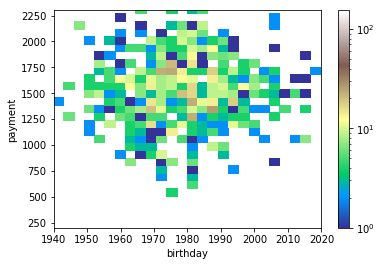

<Figure size 432x288 with 0 Axes>

In [120]:
path = os.path.join('birthday_vs_payment.png')

plt.hist2d(birthday,payment,bins=40,cmap='terrain',norm=LogNorm())
plt.axis([1940,2020,200,2300])
plt.xlabel('birthday')
plt.ylabel('payment')
#plt.legend(loc='upper right')
plt.colorbar()
plt.show()
plt.savefig(path,format='png', dpi=300)

In [1]:
plt.scatter(birthday,payment)
plt.show()

NameError: ignored

In [0]:
import csv
with open('yourNewFileName.csv', 'w', ) as myfile:
  wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
  dummylist = ['a','b','c']
  wr.writerow(payment)
  #for word in payment:
  #  wr.writerows(str(word))

In [0]:
payment.shape

In [0]:
payment[0]

In [0]:
loc.shape

In [0]:
loc[0:10]

In [0]:
inputs[-1]

In [0]:
payment.shape

In [0]:
loc[0:94]

In [0]:
df = pd.DataFrame(payment,loc)

In [0]:
df.to_csv('output.csv')

In [0]:
loc.shape

In [0]:
payment.shape

In [0]:
mu, sigma = payment.mean(),payment.std()

In [0]:
mu,sigma

In [0]:
train_x = inputs[:1000]
train_y = payment[:1000]

test_x = loc[2000:4000]
test_y = payment[2000:4000]

In [0]:
train_y = (train_y - train_y.mean())/train_y.std()

In [103]:
train_y.mean()

1.270095140171179e-16

In [104]:
train_y.std()

1.0

In [105]:
import keras
from keras import layers
from keras.models import Model
from keras import backend as K 
import numpy as np 
from keras import Input
from keras import Sequential
from keras import models


Using TensorFlow backend.


In [106]:
loc_shape = (3,)

input_loc = keras.Input(shape=loc_shape)

ans = layers.Dense(2,activation='elu',input_shape=(3,))(input_loc)
ans = layers.Dense(2,activation='elu')(ans)
ans = layers.Dense(2,activation='elu')(ans)
ans = layers.Dense(4,activation='elu')(ans)
ans = layers.Dense(3,activation='elu')(ans)
ans = layers.Dense(2,activation='elu')(ans)
price = layers.Dense(1,activation='tanh',name='que_pool')(ans)

predictor = Model(input_loc,price)

W0827 09:06:34.621632 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 09:06:34.649058 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 09:06:34.654610 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [107]:
predictor.compile(optimizer='rmsprop',loss='MSE',metrics=['acc'])

W0827 09:06:36.562123 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [108]:

predictor.fit(train_x,train_y,epochs=30,batch_size=128)

W0827 09:06:39.456113 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0827 09:06:39.464330 140000996124544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/30
1000/1000 [==============================] - 0s 313us/step - loss: 1.1504 - acc: 0.0000e+00
Epoch 2/30
1000/1000 [==============================] - 0s 17us/step - loss: 1.1062 - acc: 0.0000e+00
Epoch 3/30
1000/1000 [==============================] - 0s 16us/step - loss: 1.0773 - acc: 0.0000e+00
Epoch 4/30
1000/1000 [==============================] - 0s 21us/step - loss: 1.0552 - acc: 0.0000e+00
Epoch 5/30
1000/1000 [==============================] - 0s 17us/step - loss: 1.0377 - acc: 0.0000e+00
Epoch 6/30
1000/1000 [==============================] - 0s 16us/step - loss: 1.0246 - acc: 0.0000e+00
Epoch 7/30
1000/1000 [==============================] - 0s 18us/step - loss: 1.0147 - acc: 0.0000e+00
Epoch 8/30
1000/1000 [==============================] - 0s 14us/step - loss: 1.0085 - acc: 0.0000e+00
Epoch 9/30
1000/1000 [==============================] - 0s 17us/step - loss: 1.0042 - acc: 0.0000e+00
Epoch 10/30
1000/1000 [==============================] - 0s 18us/step - loss: 1.0

In [109]:
train_x[0:10]

array([[-117.   ,   32.6  , 1951.   ],
       [-117.15 ,   32.82 , 1900.   ],
       [-117.17 ,   32.75 , 1993.   ],
       [-117.21 ,   32.77 , 1992.   ],
       [-117.2  ,   32.95 , 1996.   ],
       [-117.162,   32.716, 1900.   ],
       [-117.17 ,   32.75 , 1983.   ],
       [-117.05 ,   32.68 , 1973.   ],
       [-117.15 ,   32.82 , 1900.   ],
       [-117.13 ,   32.76 , 1975.   ]])

In [110]:
train_y[0:10]

array([-0.52049539,  2.16482352, -0.76461529, -1.44426729, -0.94215704,
        0.08425618, -1.28337008, -2.32087966,  0.00935576,  0.42269513])

In [111]:
payment[0:10]

array([1321., 2289., 1233.,  988., 1169., 1539., 1046.,  672., 1512.,
       1661.])

In [0]:
result = predictor.predict(train_x[0:10])

In [113]:
result 

array([[0.00754036],
       [0.00754039],
       [0.00754033],
       [0.00754027],
       [0.00754033],
       [0.00754039],
       [0.00754027],
       [0.00754027],
       [0.00754039],
       [0.00754027]], dtype=float32)

In [114]:
result = result*sigma+mu

NameError: ignored

In [115]:
mu

NameError: ignored

In [116]:
result

array([[0.00754036],
       [0.00754039],
       [0.00754033],
       [0.00754027],
       [0.00754033],
       [0.00754039],
       [0.00754027],
       [0.00754027],
       [0.00754039],
       [0.00754027]], dtype=float32)

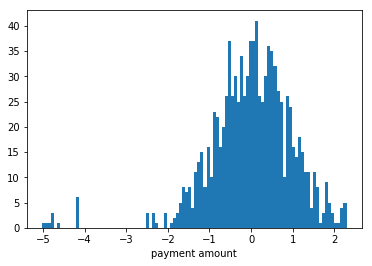

In [117]:
import matplotlib.pyplot as plt 

#payment.hist(bins=100,figsize=(20,15))
#payment.histogram(payment.arange(4), bins=np.arange(5), density=True)
plt.xlabel("payment amount")
plt.hist(train_y,bins=100)

plt.show()

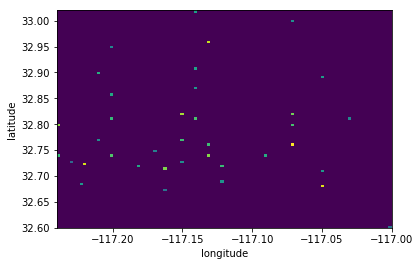

In [118]:
plt.hist2d(xx,yy,bins=100,weights=payment)
#plt.axis([-200,200,0,80])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [40]:
#with open('output.csv','rb') as file: 
output = open('outputfile.csv','w')
  for line in lines:
    if(line.find(',')==0):
      line = line[1:]
    _name = line[:line.find(',')]
    print(_name)
    line = line[line.find(',')+1:]
    print(line)
    _dob = line[:line.find(',')]
    print(_dob)
    
    line = line[line.find(',')+1:]
    _houseID = line[:line.find(',')]
    print(_houseID)
    line = line[line.find(',')+1:]
    _houseZip = line[:line.find(',')]
    print(_houseZip)
    line = line[line.find(',')+1:]
    _paymentDate = line[:line.find(',')]
    print(_paymentDate)
    line = line[line.find(',')+1:]
    _paymentAmount = line[:line.find(',')]
    print(_paymentAmount)
    line = line[line.find(',')+1:]
    _rentAmount = line[:line.find('\n')]
    print(_rentAmount)
    
    
    # using Zipcode
    location = search.by_zipcode("60608")
    
    
    
    # using geocode 
    location = geolocator.geocode(_houseZip)
    if(location!=None):
      print(location)
      print(location.latitude,location.longitude)
      x = location.latitude,location.longitude
      loc.append(x)
      payment.append(_paymentAmount)
      #file.write(str(x[0]))
      #file.write(x[1])
      file.write(_paymentAmount)
      file.write('\n')

IndentationError: ignored

In [15]:
testf = open('csvfile.csv','w')

dummylist = [] 

dummylist = ['a','b','c']

for word in dummylist:
  testf.writerows([word])
#testf.write() #Give your csv text here.
## Python will convert \n to os.linesep
testf.close()

AttributeError: ignored

In [384]:
with open('csvfile.csv','wb') as file:
    for line in text:
        file.write(line)
        file.write('\n')

NameError: ignored